In [ ]:
import pandas as pd

data = pd.read_csv('BTC_dataset.csv')


In [ ]:
data.head()

In [ ]:
data.head()

,Date,Close,Close_1,Close_2,Close_3,Close_4,Close_5,Close_6,Close_7,Close_8,Close_9,Close_10,Close_11,Close_12,Close_13,Close_14,Close_15,Close_16,Close_17,Close_18,Close_19,Close_20,Close_21,Close_22,Close_23,Close_24,Close_25,Close_26,Close_27,Close_28,Close_29,Close_30
0,2017-01-13,823.984009,804.833984,777.757019,907.679016,902.828003,911.198975,908.585022,902.200989,1013.380005,1154.729980,1043.839966,1021.750000,998.325012,963.742981,961.237976,973.497009,975.921021,933.197998,907.609985,896.182983,898.822021,921.984009,864.539978,834.281006,800.875977,792.713989,790.530029,790.828979,784.906982,778.088013,781.481018
1,2017-01-14,818.411987,823.984009,804.833984,777.757019,907.679016,902.828003,911.198975,908.585022,902.200989,1013.380005,1154.729980,1043.839966,1021.750000,998.325012,963.742981,961.237976,973.497009,975.921021,933.197998,907.609985,896.182983,898.822021,921.984009,864.539978,834.281006,800.875977,792.713989,790.530029,790.828979,784.906982,778.088013
2,2017-01-15,821.797974,818.411987,823.984009,804.833984,777.757019,907.679016,902.828003,911.198975,908.585022,902.200989,1013.380005,1154.729980,1043.839966,1021.750000,998.325012,963.742981,961.237976,973.497009,975.921021,933.197998,907.609985,896.182983,898.822021,921.984009,864.539978,834.281006,800.875977,792.713989,790.530029,790.828979,784.906982
3,2017-01-16,831.533997,821.797974,818.411987,823.984009,804.833984,777.757019,907.679016,902.828003,911.198975,908.585022,902.200989,1013.380005,1154.729980,1043.839966,1021.750000,998.325012,963.742981,961.237976,973.497009,975.921021,933.197998,907.609985,896.182983,898.822021,921.984009,864.539978,834.281006,800.875977,792.713989,790.530029,790.828979
4,2017-01-17,907.937988,831.533997,821.797974,818.411987,823.984009,804.833984,777.757019,907.679016,902.828003,911.198975,908.585022,902.200989,1013.380005,1154.729980,1043.839966,1021.750000,998.325012,963.742981,961.237976,973.497009,975.921021,933.197998,907.609985,896.182983,898.822021,921.984009,864.539978,834.281006,800.875977,792.713989,790.530029


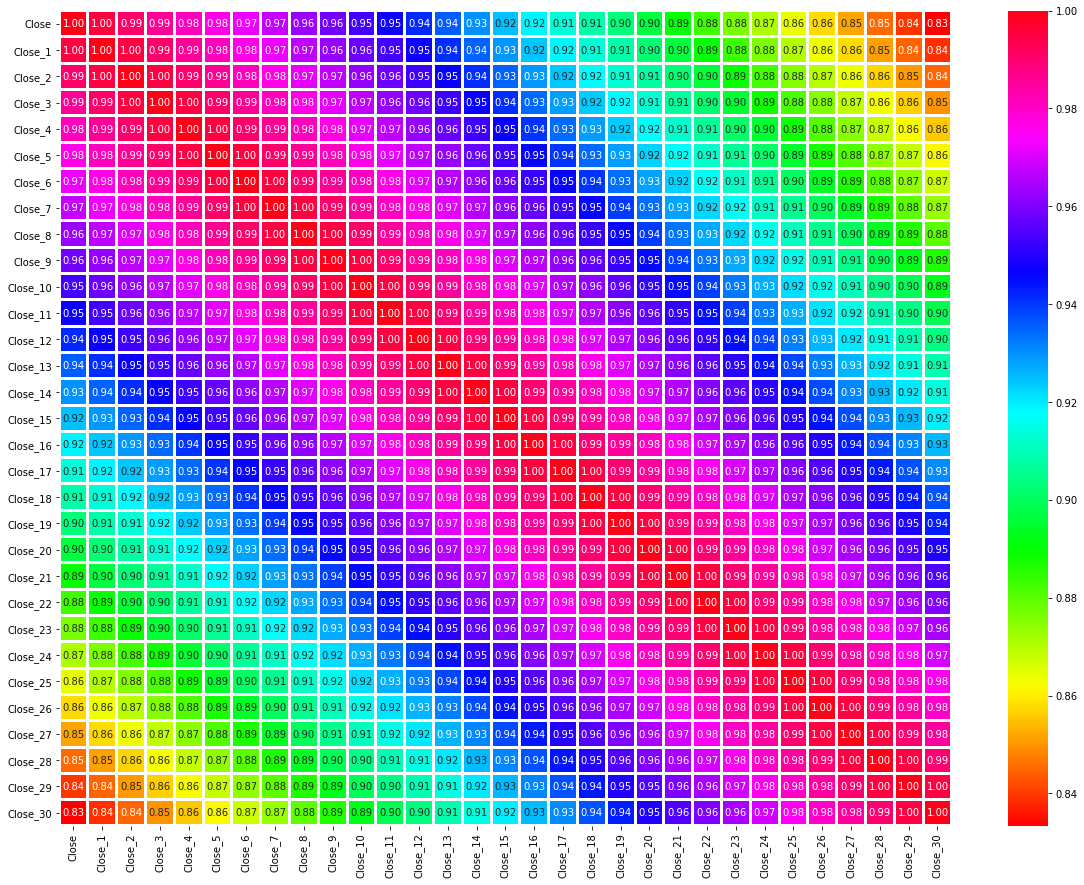

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,15))
sns.heatmap(data.corr(), annot=True, cmap='hsv', fmt='.2f', linewidths=2)
plt.show()

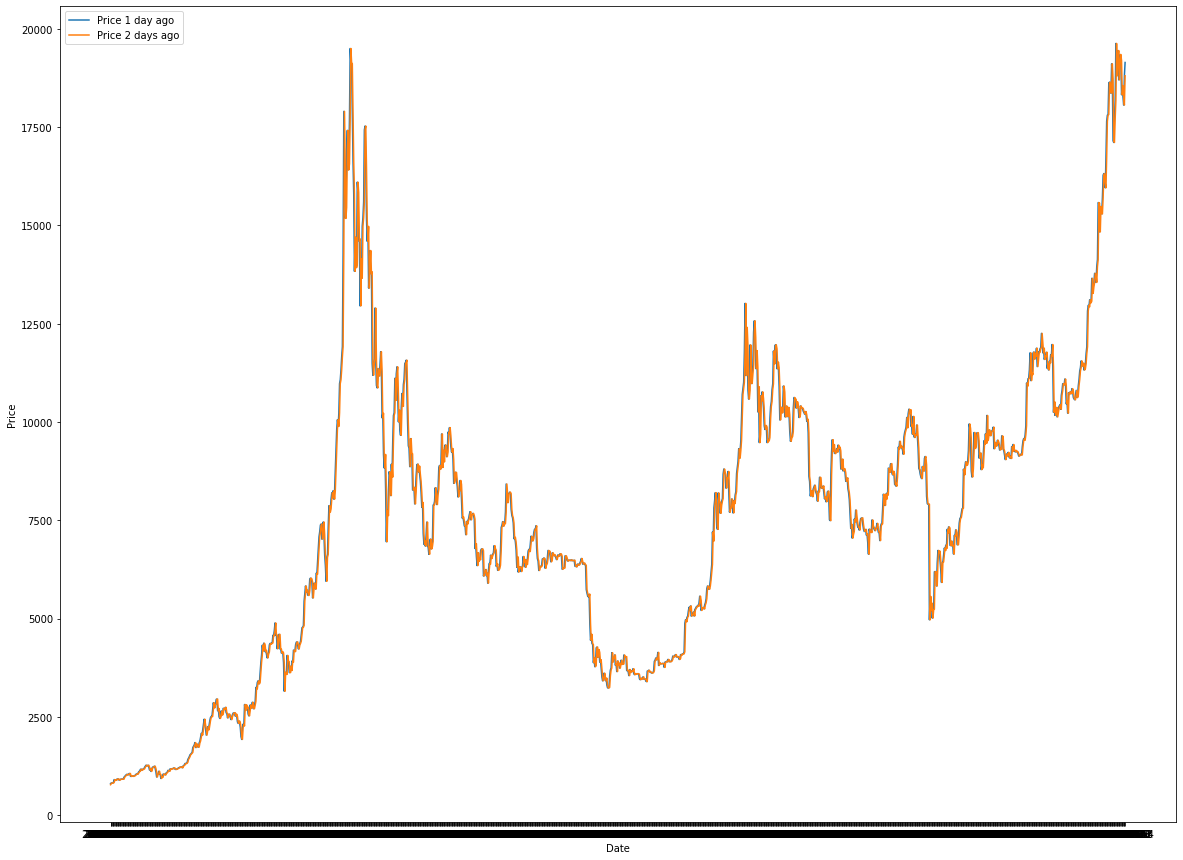

In [ ]:
plt.figure(figsize=(20,15))
plt.plot(data.Date, data.Close_1, label="Price 1 day ago")
plt.plot(data.Date, data.Close_2, label="Price 2 days ago")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

In [ ]:
data = data.drop(['Date'], axis=1)

In [ ]:
Y = data.Close.values
X = data[data.columns[1:]]

In [ ]:
# creating empty matrix to enter information from the models
matrix = []

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64, input_dim=30, kernel_initializer='uniform', activation='selu'))
model.add(Dense(128, kernel_initializer='uniform', activation='selu'))
model.add(Dense(64, kernel_initializer='uniform', activation='selu'))
model.add(Dense(64, kernel_initializer='uniform', activation='selu'))
model.add(Dense(32, kernel_initializer='uniform', activation='selu'))
model.add(Dense(8, kernel_initializer='uniform', activation='selu'))
model.add(Dense(1, kernel_initializer='uniform', activation='linear'))

model.compile(loss='mae', optimizer='adam')
model.fit(X_train, Y_train, epochs=200, batch_size=50, verbose=1, validation_split=0.2)

Epoch 1/200
19/19 [==============================] - 0s 10ms/step - loss: 7497.6987 - val_loss: 7086.8252
Epoch 2/200
19/19 [==============================] - 0s 3ms/step - loss: 7497.1299 - val_loss: 7085.6050
Epoch 3/200
19/19 [==============================] - 0s 3ms/step - loss: 7493.8252 - val_loss: 7076.9194
Epoch 4/200
19/19 [==============================] - 0s 3ms/step - loss: 7467.5103 - val_loss: 7009.4263
Epoch 5/200
19/19 [==============================] - 0s 3ms/step - loss: 7292.4692 - val_loss: 6622.5449
Epoch 6/200
19/19 [==============================] - 0s 3ms/step - loss: 6458.9248 - val_loss: 5089.9370
Epoch 7/200
19/19 [==============================] - 0s 3ms/step - loss: 3616.5325 - val_loss: 1140.1387
Epoch 8/200
19/19 [==============================] - 0s 3ms/step - loss: 1203.0598 - val_loss: 938.3271
Epoch 9/200
19/19 [==============================] - 0s 3ms/step - loss: 895.8069 - val_loss: 644.0371
Epoch 10/200
19/19 [==============================] - 0s 

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
print("r_square score: ", r2_score(Y_test,y_pred))

r_square score:  0.9904153482800295


In [ ]:
matrix.append(["1", "8", "30, 64, 128, 64, 64, 32, 8, 1", "selu and linear", "mae", "adam", "200", "50", "0.9904153482800295"])

In [ ]:
model = Sequential()
model.add(Dense(32, input_dim=30, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mae', optimizer='adam') 
model.fit(X_train, Y_train, epochs=50, batch_size=10,  verbose=1, validation_split=0.2)

Epoch 1/50
92/92 [==============================] - 0s 2ms/step - loss: 7442.5269 - val_loss: 6729.6641
Epoch 2/50
92/92 [==============================] - 0s 1ms/step - loss: 5434.1123 - val_loss: 3709.4617
Epoch 3/50
92/92 [==============================] - 0s 1ms/step - loss: 3662.7632 - val_loss: 3567.9133
Epoch 4/50
92/92 [==============================] - 0s 1ms/step - loss: 3551.4116 - val_loss: 3477.3525
Epoch 5/50
92/92 [==============================] - 0s 1ms/step - loss: 3456.3767 - val_loss: 3427.8545
Epoch 6/50
92/92 [==============================] - 0s 1ms/step - loss: 3334.4114 - val_loss: 3220.6008
Epoch 7/50
92/92 [==============================] - 0s 1ms/step - loss: 3118.3215 - val_loss: 2918.1350
Epoch 8/50
92/92 [==============================] - 0s 2ms/step - loss: 2681.3987 - val_loss: 2372.4504
Epoch 9/50
92/92 [==============================] - 0s 1ms/step - loss: 2036.0447 - val_loss: 1697.1947
Epoch 10/50
92/92 [==============================] - 0s 1ms/step

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("r_square score: ", r2_score(Y_test,y_pred))

r_square score:  0.9902883358421354


In [ ]:
matrix.append(["2", "6", "30, 32, 64, 32, 8, 1", "relu and linear", "mae", "adam", "50", "10", "0.9902883358421354"])

In [ ]:
from keras.layers import Dropout

model = Sequential()
model.add(Dense(32 , input_dim=30, activation='linear'))
model.add(Dropout(0.2, input_shape=(32,)))
model.add(Dense(32 , activation='linear'))
model.add(Dropout(0.2, input_shape=(64,)))
model.add(Dense(16 , activation='linear'))
model.add(Dropout(0.2, input_shape=(64,)))
model.add(Dense(8 , activation='linear'))
model.add(Dropout(0.2, input_shape=(8,)))
model.add(Dense(1 , activation='linear'))

model.compile(loss='mae', optimizer='nadam') 
model.fit(X_train, Y_train, epochs=250, batch_size=20,  verbose=1, validation_split=0.2)

Epoch 1/250
46/46 [==============================] - 0s 4ms/step - loss: 7497.3154 - val_loss: 7085.7207
Epoch 2/250
46/46 [==============================] - 0s 2ms/step - loss: 7493.9185 - val_loss: 7078.1567
Epoch 3/250
46/46 [==============================] - 0s 2ms/step - loss: 7455.7876 - val_loss: 6969.4810
Epoch 4/250
46/46 [==============================] - 0s 2ms/step - loss: 7025.2319 - val_loss: 6137.5220
Epoch 5/250
46/46 [==============================] - 0s 2ms/step - loss: 5049.3662 - val_loss: 2936.0271
Epoch 6/250
46/46 [==============================] - 0s 2ms/step - loss: 2133.1243 - val_loss: 749.2084
Epoch 7/250
46/46 [==============================] - 0s 2ms/step - loss: 1737.9315 - val_loss: 895.2610
Epoch 8/250
46/46 [==============================] - 0s 2ms/step - loss: 1614.1179 - val_loss: 578.1569
Epoch 9/250
46/46 [==============================] - 0s 2ms/step - loss: 1630.8221 - val_loss: 597.5953
Epoch 10/250
46/46 [==============================] - 0s 2m

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("r_square score: ", r2_score(Y_test,y_pred))

r_square score:  0.9866631958393036


In [ ]:
matrix.append(["3", "6", "30, 32, 32, 16, 8, 1", "linear", "mae", "nadam", "250", "20", "0.9866631958393036"])

In [ ]:
import numpy as np

df = pd.DataFrame(np.array(matrix),
                  columns=['No. of the model', 'No. of layers', 'No. of neurons in each layer', 'Activation function', 'Loss function', 
                           'Optimizer function', 'Epochs', 'Batch size', 'R2 score'])

In [ ]:
df

,No. of the model,No. of layers,No. of neurons in each layer,Activation function,Loss function,Optimizer function,Epochs,Batch size,R2 score
0,1,8,"30, 64, 128, 64, 64, 32, 8, 1",selu and linear,mae,adam,200,50,0.9904153482800295
1,2,6,"30, 32, 64, 32, 8, 1",relu and linear,mae,adam,50,10,0.9902883358421354
2,3,6,"30, 32, 32, 16, 8, 1",linear,mae,nadam,250,20,0.9866631958393036
